# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Using df.shape returns the number of rows and columns in the dataset.
print('The dataset has',df.shape[0],'rows and',df.shape[1],'columns.')

The dataset has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Print a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* We observe all columns have no missing entries.
* 1 column has a float datatype, 4 have the integer datatype and 4 have the object datatype.
* Therefore, there are 5 datatypes are numerical columns while 4 are categorical columns.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Checking the presence of Not-a-Number (NaN) and return the sum of elements for each row and column.  
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in datasets.Therefore, no treatment required.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Checking the statistical summary of the data.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
It takes a minimum time of 20 minutes, an average time of 27.37 minutes and a maximum time of 35 minutes, for food to be prepared once an order is placed.

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
# Checking the number of values that each unique entry has in a column.
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [8]:
# Getting the percentages on rating.
df['rating'].value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

#### Observations:
There are 736 orders not rated which translates to 38.77% of the orders not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Observation on Order ID:

In [9]:
# Checking unique entries in the column.
print('There are',df['order_id'].nunique(),'unique Order ID entries in the dataset.')

There are 1898 unique Order ID entries in the dataset.


#### Observation on Customer ID:

In [10]:
print('There are',df['customer_id'].nunique(),'unique Customer ID entries in the dataset.')

There are 1200 unique Customer ID entries in the dataset.


#### Observation on Restaurant name:

In [11]:
print('There are',df['restaurant_name'].nunique(),'different Restaurants in the dataset.')

There are 178 different Restaurants in the dataset.


#### Observation on Cuisine type:

In [12]:
print('There are',df['cuisine_type'].nunique(),'unique cuisines in the dataset.')

There are 14 unique cuisines in the dataset.


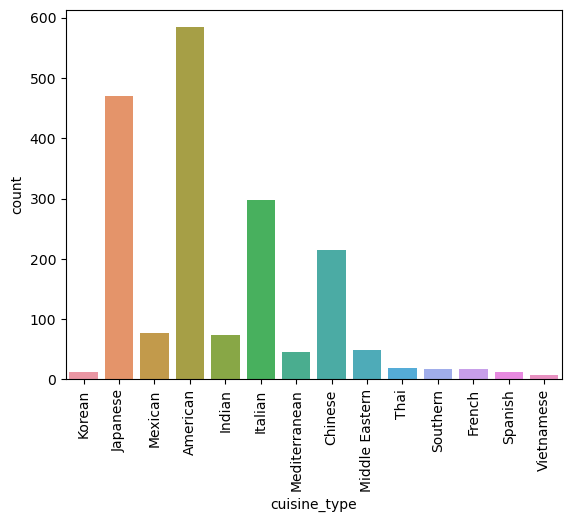

In [13]:
# Creating a barplot.
sns.countplot(data=df, x='cuisine_type');
plt.xticks(rotation=90)
plt.show()

* The are 14 different cuisines in the dataset. 
* The most popular cuisine is the American, followed by Japanese, Italian and Chinese cuisines.
* We can observe a very close tie between the Mexican and Indian cuisines.
* Vietnamese cuisine is the least popular.

#### Observation on Cost of the Order:

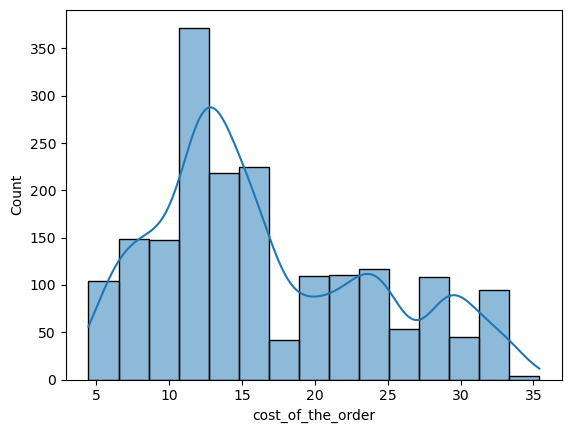

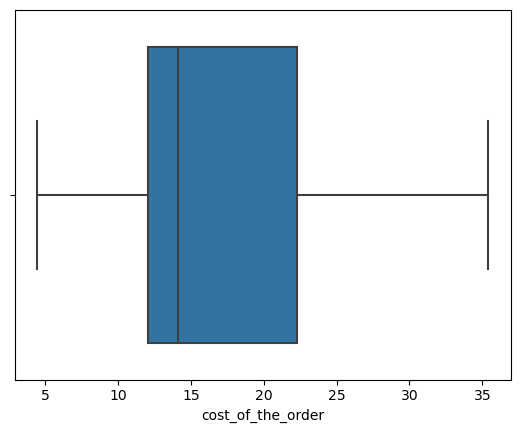

In [14]:
# Creating a histogram with density curve and a boxplot.
sns.histplot(data=df, x='cost_of_the_order',bins=15, kde=True);
plt.show()
sns.boxplot(data=df, x='cost_of_the_order');
plt.show()

* The data has a multimodal distibution. 
* It has a positive skew mostly towards the right.
* The minimum cost is about 4 dollars and the maximum cost about 35 dollars.
* The median cost is about 14 dollars.
* There is a wider spread of cost above the median.
* Therefore,we can note that Students are represented to the left of the median while the professionals are represented to the right of the median as seen above.

#### Observation on Day of the week:

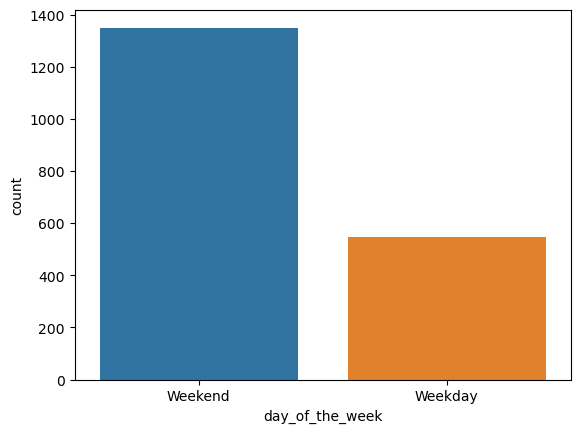

In [15]:
sns.countplot(data=df, x='day_of_the_week');
plt.show()

The weekend has a higher activity compared to the weekday.

#### Observation on Rating:

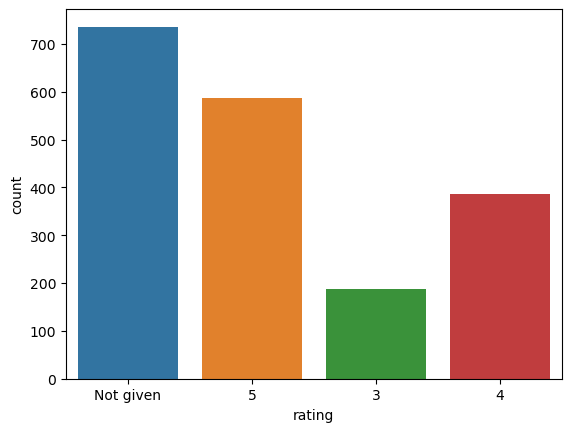

In [16]:
sns.countplot(data=df, x='rating');
plt.show()

* We observe that a higher number of customers have not rated the services provided.
* The highest rate given by customers is 5, while the least rating recorded is 3.

#### Observation on Food preparation Time:

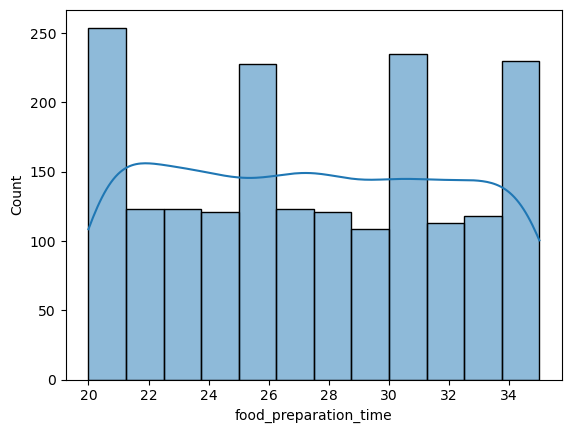

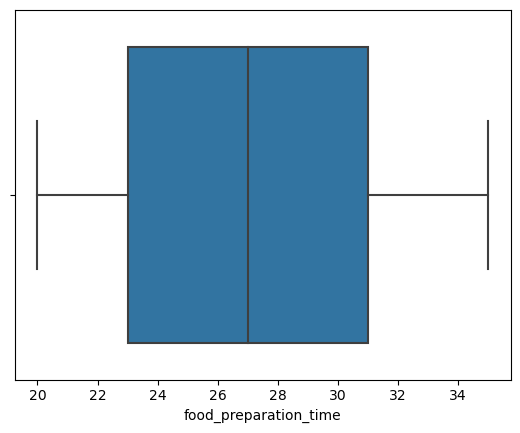

In [17]:
sns.histplot(data=df, x='food_preparation_time', kde=True);
plt.show()
sns.boxplot(data=df, x='food_preparation_time');
plt.show()

* There is a slighlty even distribution on the time taken in food preparation, where the minimum time is 20 minutes and the maximum time is 35 minutes.
* The median is 27 minutes.

#### Observation on delivery time:

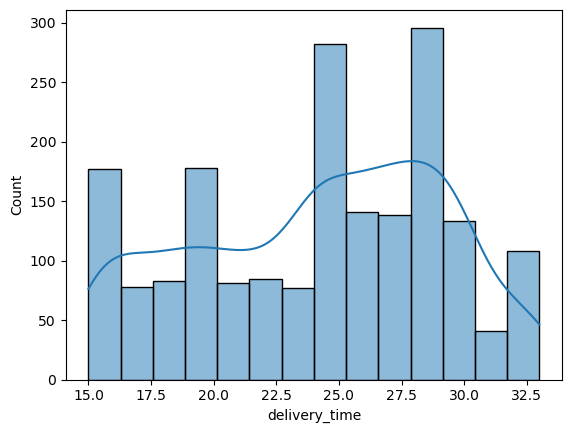

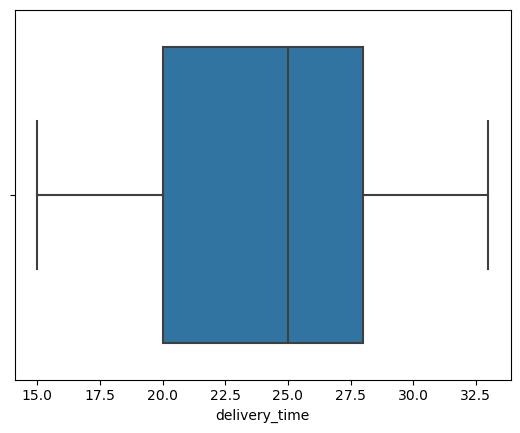

In [18]:
sns.histplot(data=df, x='delivery_time', kde=True);
plt.show()
sns.boxplot(data=df, x='delivery_time');
plt.show()

* The delivery time is skewed to the left.
* We can observe that most orders take between 25 to 28 minutes to be delivered.
* The median delivery time is 25 minutes, while the minimum and maximum delivery time is 15 minutes and about 33 munites respectively.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [19]:
# Filtering the data into groups based on given criteria.
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Shake Shack restaurant is leading with 219 orders, followed by The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm restaurants with 132, 119,96 and 68 orders respectively.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [20]:
# Creating dataframe for the weekend and checking the unique count of the cuisines.
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head()

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations:
The most popular cuisine on weekends is the American cuisine, with 415 orders placed.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [21]:
# Creating a dataframe for orders that cost above USD 20, then get the percentage.
df_cost_above_20 = df[df['cost_of_the_order']>20]
print('There are',df_cost_above_20.shape[0],'orders cost above 20 dollars.')
      
percentage = (df_cost_above_20.shape[0] / df.shape[0]) * 100
print('Therefore,',round(percentage, 2),'%','of the orders cost more than 20 dollars.')


There are 555 orders cost above 20 dollars.
Therefore, 29.24 % of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [22]:
# Getting the mean.
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [23]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The most frequent customer is Customer ID 52832, with 13 orders placed, while Customer ID 47440 and ID 83287 follows closely with 10 and 9 orders placed respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Revenue generated by the top 10 restaurants:

In [24]:
# Checking top 10 restaurant with the highest revenue 
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64

Shake Shack generates the highest revenue compared to the restaurants, followed by The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.


#### Revenue generated from the Cuisine types:

In [25]:
# # Checking top 10 cuisines with the highest revenue
df.groupby(['cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending = False)

cuisine_type
American          9530.78
Japanese          7663.13
Italian           4892.77
Chinese           3505.62
Mexican           1303.85
Indian            1235.14
Middle Eastern     922.21
Mediterranean      711.84
Thai               364.95
French             356.29
Southern           328.11
Spanish            227.93
Korean             182.02
Vietnamese          90.18
Name: cost_of_the_order, dtype: float64

* The American cuisine brings more revenue to the restaurants compared to the other cuisines, followed by Japanese and Italian cuisines.
* Vietnamese cuisine has the least revenue.

#### Relationship between Cuisine type and Cost of the order:

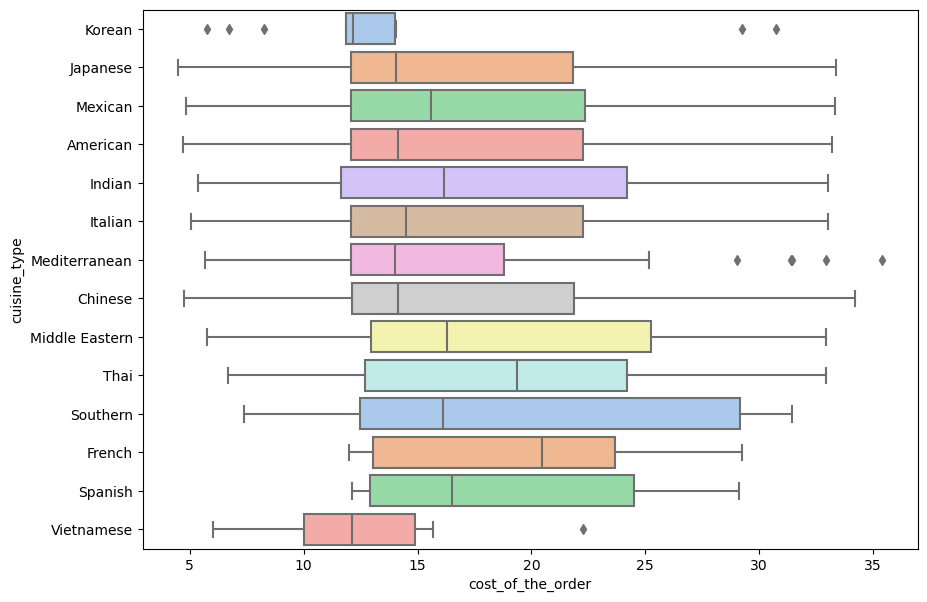

In [26]:
# creating boxplot
plt.figure(figsize=(10,7))
sns.boxplot(x ="cost_of_the_order", y = "cuisine_type", data = df, palette ='pastel')
plt.show()

* 85% of the cuisine types cost above the median cost, which is about 14 dollars.
* Most of the cuisine types have a right skewed distribution on cost with the exception of Thai and French cuisines.
* There are outliers present as observed in the Korean, Mediterranean and Vietnamese cuisines.
* French cuisine has the highest median cost of about 22 dollars compared to the rest of the cuisines.
* Korean cuisine is the cheapest ordered cuisine in this dataset.

#### Relationship between Cuisine type and Food preparation time:

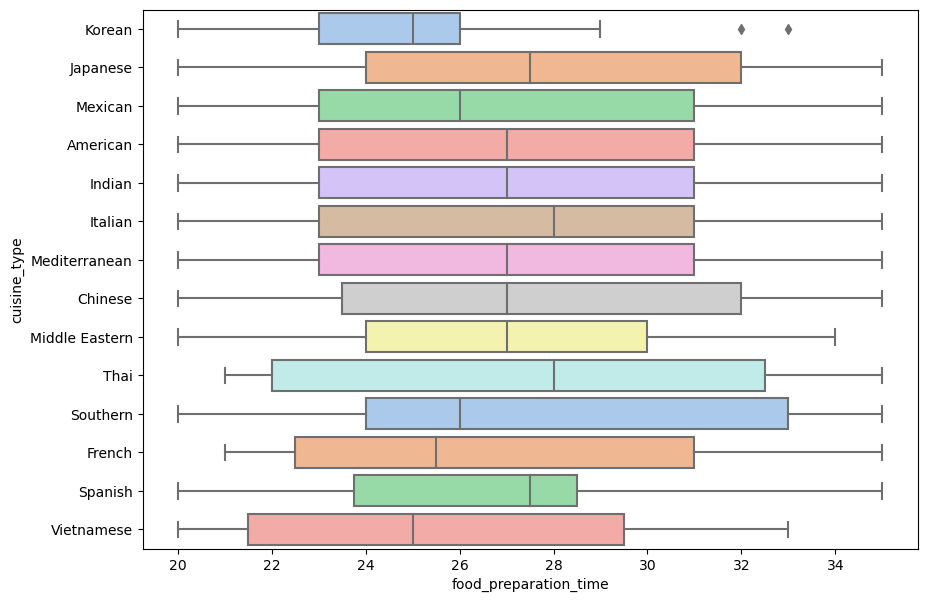

In [27]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "food_preparation_time", y = "cuisine_type", data = df, palette ='pastel')
plt.show()

* 29% of the cuisine types take less than the median food preparation time of 27 minutes as observed in Korean, Mexican, Southern, France and Vietnamese cuisine types.
* Despite the presence of outliers, the Korean cuisine type has the least preparation time.

#### Relationship between Cuisine type and Day of the week:

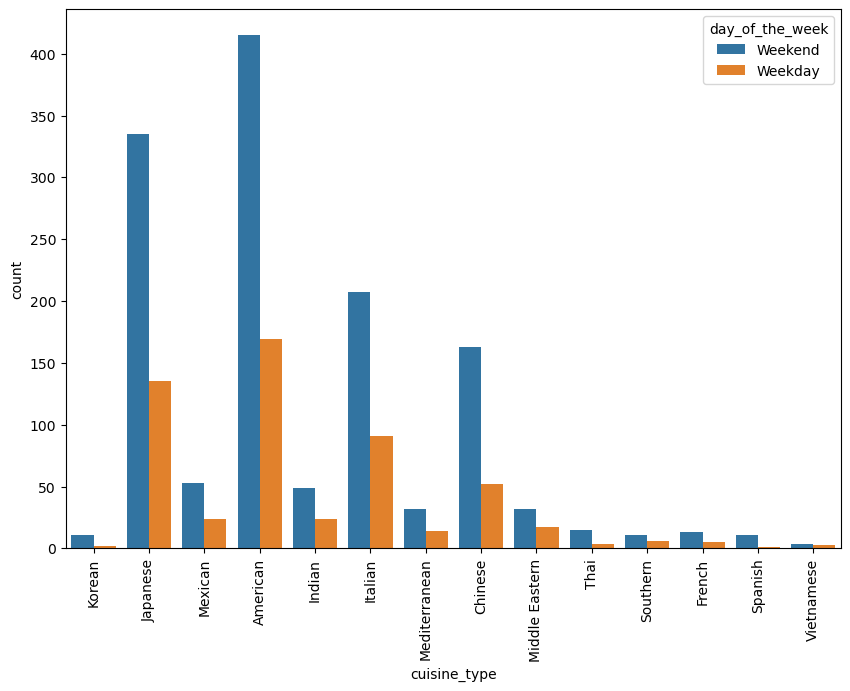

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(x='cuisine_type', data=df, hue='day_of_the_week');
plt.xticks(rotation=90)
plt.show()

* The demand is lower on weekday compared to the weekend.

#### Relationship between Food preparation time and Day of the week:

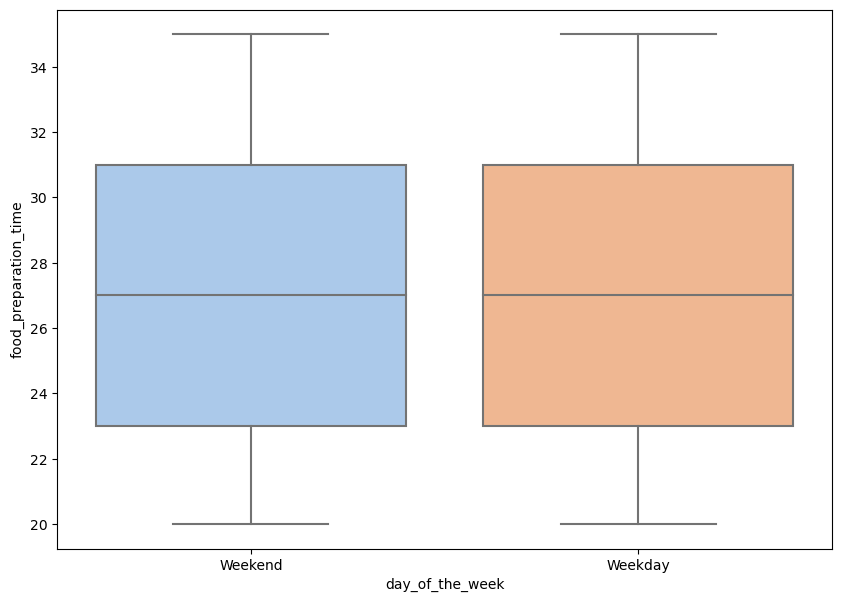

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "day_of_the_week", y = "food_preparation_time", data = df, palette ='pastel')
plt.show()

Food preparation time is fairly consistent irrespective of the day of week.

#### Relationship between Day of week and Delivery time:

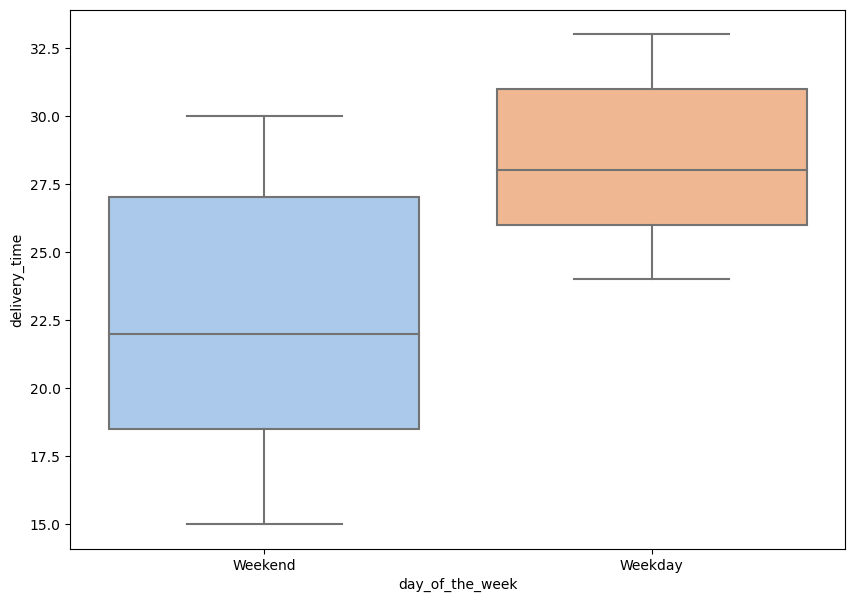

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette ='pastel')
plt.show()

* The median delivery time for weekend is about 22.5 minutes while that of the weekdays about 28 minutes. 
* We can also note that delivery time during the weekday is longer compared to the weekend.

#### Correlation among the Cost of the order, Food preparation time and Delivery time:

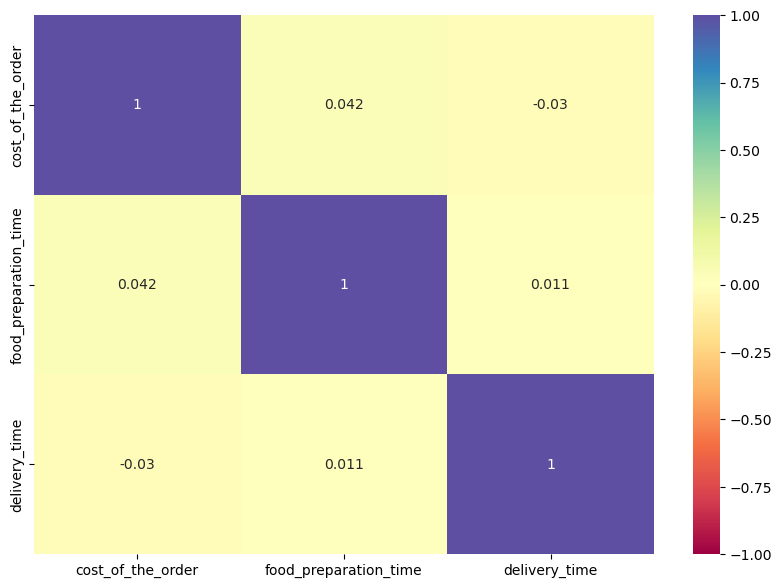

In [31]:
# Checking correlation among the variables. 
col_list = ["cost_of_the_order", "food_preparation_time", "delivery_time"]
plt.figure(figsize=(10, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

* The heatmap shows very weak correlation between the variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [32]:
# Filtering the rated restaurants returning a copy of the specified list
df_rated = df[df['rating'] != 'Not given'].copy()

# Converting rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Creating a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [33]:
# Getting the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']

# Filtering the data of restaurants that have a rating count more than 50. 
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy() # isin() method helps in selecting rows with having a particular or multiple value in a particular column.

# Grouping the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
Only 4 restaurants qualify for the promotional offer; The Meatball shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi as their average mean is greater than 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [34]:
# Function for computing the revenue.

def revenue_comp(i):
    """
    Creating revenue based on the conditions taking a dataframe.

    """
    if i > 20:
        return i*0.25
    elif i > 5:
        return i*0.15
    else:
        return i*0
    
df['Revenue'] = df['cost_of_the_order'].apply(revenue_comp) #Creating a column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [35]:
# Getting the sum of total revenue.
total_rev = df['Revenue'].sum() 

print('The net revenue generated is around', round(total_rev, 2), 'dollars')

The net revenue generated is around 6166.3 dollars


#### Observations:
* The net revenue generated is around 6,166.30 dollars.
* No commision is charged for orders below 5 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [36]:
# Calculating the total delivery time  and create a new column to  store the total time.
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [37]:
# Creating a dataframe for orders that take more than 60 minutes to get delivered, then get the percentage.
df_deliverytime_above_60 = df[df['total_time']>60]
print('There are', df_deliverytime_above_60.shape[0],'orders.')
      
percentage = (df_deliverytime_above_60.shape[0] / df.shape[0]) * 100
print(round(percentage, 2),'%','of the orders represents',df_deliverytime_above_60.shape[0],'orders.')

There are 200 orders.
10.54 % of the orders represents 200 orders.


#### Observations:
* There are 200 orders that take more than 60 minutes to get delivered from the time the order was placed.
* Therefore, this translates to 10.54 % of the orders that take more than 60 minutes from order placement to delivery.

In [38]:
#Checking the maximum and minimum total time it takes to deliver food from order placement to delivery.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0
Revenue,1898.0,NaN,NaN,NaN,3.248842,2.295598,0.0,1.812,2.121,5.574375,8.8525


#### Observations:

* The minimum total time it takes to deliver food from order placement to delivery is 35 minutes
* The median total time it takes to deliver food from order placement to delivery is 52 minutes
* The maximum total time it takes to deliver food from order placement to delivery is 68 minutes
* The average total time it takes to deliver food from order placement to delivery is 51.53 minutes

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [39]:
# Getting the mean delivery time on weekdays and weekends.
round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean())
print('Mean delivery time on weekdays;',round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),'minutes')

round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean())
print('Mean delivery time on weekdays;',round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),'minutes')

Mean delivery time on weekdays; 28 minutes
Mean delivery time on weekdays; 22 minutes


#### Observations:
The mean delivery time on weekdays is around 28 minutes, while the mean delivery time on weekends is around 22 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* There is a higher percentage of unrated orders which is about 38.77% of the orders.
* Food preparation time is fairly consistent irrespective of the day of the week. However, the total time taken from the time the order is placed to delivery is all dependant on the delivery time. 10.54% of the orders placed take over an hour to be delivered.
* Lower demand and popularity on some cuisines given that the 4 top most cuisines ordered are American, Japanes, Italiane and Chinese cuisines.
* Given the two target market, we can observe a multimodal distribution on the cost of orders with a higher peak at around 12 dollars,a representation of students. While the two other slight peaks at around 24 dollars and 29 dollars respectively, is a representation of the working professionals.
* Out of the 178 restaurants, only 4 restaurants qualify for the promotional offer. There could be many factors influencing this outcome, a good example being the higher percentage on unrated orders.

### Recommendations:

* Reduce the percentage on unrated orders by improving the rating experience for the customers.This can be carried out through sensitizing customers to provide feedback to improve on service delivery and customer satisfaction.
* Improve on total time taken to fulfil an order by evaluating the causes of the longer delivery time especially in weekdays compared to weekends. This could address the less ordering in weekdays, increase their revenue and boost the overall service delivery.
* Select appropriate market strategy to address the demand & popularity of the cuisines and multimodal distribution on the cost of orders. For example running of advertisement on the social media platform including the app, to display the variety of cuisines and their cost. This may attract the students who assumes the southern cuisine is costly yet it is affordable whereas, the working professional may order southern cuisine, yet the Korean cuisine takes a shorter preparation time and is cost friendly.
* The company should conduct a further analysis before rolling out the promotional offer, in order to make a fair decision and competitve at the same time.

---